In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [3]:
path_to_py = os.path.abspath('../src')

In [36]:
print(path_to_py)

/Users/gedelasnigda/loan_default/src


In [73]:
loan_data = pd.read_csv(os.path.join(path_to_py,"data","training_loan_data.csv"),skiprows=1)
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


## Understanding the size of the data and the features present in the data

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 non-null  float64
 13 

In [26]:
loan_data.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,1.991210e+05,1.894570e+05,199121.000000,1.894570e+05,180419.000000,180333.000000,189457.000000,189457.000000,161472.000000,181962.000000,32749.000000,181962.000000,1.617160e+05,199121.0,199121.000000,189457.000000
mean,1.009857e+07,5.929626e+06,14071.947334,7.224330e+04,53.575807,66.840867,17.061084,0.803549,6.993634,20239.424699,41.780054,20238.384308,1.373215e+05,1.0,183.967954,0.069293
std,5.704397e+04,3.339822e+06,8067.076636,5.180483e+04,34.153946,26.111490,7.596941,1.032936,5.879707,18879.795379,20.984599,18941.591779,1.507358e+05,0.0,104.858324,0.253952
min,1.000000e+07,1.515360e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,1.004958e+07,2.308792e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,25.000000,7834.720066,2.746575e+04,1.0,105.000000,0.000000
50%,1.009823e+07,6.060627e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,41.000000,14637.479485,8.076050e+04,1.0,157.000000,0.000000
75%,1.014801e+07,8.727745e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,58.000000,26397.825272,2.082122e+05,1.0,256.000000,0.000000
max,1.019779e+07,1.209899e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,165.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


- The first two columns, **"id"** and **"member_id,"** are completely unique identifiers for each record. Since they do not contribute to predictive analysis, these columns can be removed.  
- The column **"application_approved_flag"** contains only a single unique value, **1,** across all rows. As it provides no variance or additional information, this column can also be removed.

In [74]:
# Drop the columns
loan_data.drop(['id','member_id','application_approved_flag'],axis=1,inplace=True)

- The 'desc' column appears to contain textual data that is unlikely to contribute to model performance.
- We'll verify its content and remove it from the dataset if confirmed.

In [75]:
# Drop the 'desc' column as it is textual data 
loan_data.drop('desc',axis=1,inplace=True)

# Check if the columns have been dropped
loan_data.head(2)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag
0,7550,36 months,16.24%,3 years,RENT,28000.0,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,99,0.0
1,27050,36 months,10.99%,10+ years,OWN,55000.0,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,353,0.0


## Correcting the datatypes
- Upon inspection, it was observed that certain features, which are expected to be numeric, are incorrectly stored as 'object' datatype. This requires conversion to ensure proper analysis and modeling.

### 'term'

In [67]:
# Examine unique values to identify appropriate cleaning values
loan_data["term"].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [76]:
# Removing 'months' from the column and convert into 'numeric' data type
loan_data['term'] = loan_data['term'].str.replace(' months', '', regex=False)
loan_data['term'] = pd.to_numeric(loan_data['term'], errors='coerce')          

### 'int_rate'

In [77]:
# Removing '%' from the column and convert into 'numeric' data type
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '', regex=False) 
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'], errors='coerce')   

### 'emp_length'

- Inconsistent representations: The emp_length column contains both numerical values (e.g., '3 years', '10+ years') and a non-numeric value ('< 1 year').
- Handle the special case < 1 year and convert it to 0 years (since it implies less than one year).
- Convert '10+ years' to 10 (or a reasonable assumption, though you could choose to treat it differently, depending on business needs).

In [70]:
loan_data["emp_length"].unique()

array(['3 years', '10+ years', '4 years', '5 years', '2 years', '7 years',
       '6 years', '1 year', '9 years', '< 1 year', '8 years', nan],
      dtype=object)

In [78]:
# Convert 'emp_length' to numeric years
loan_data['emp_length'] = loan_data['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})

# Extract numeric part of the 'emp_length' and convert to integer
loan_data['emp_length'] = loan_data['emp_length'].str.extract('(\d+)').astype(float)

# Check the cleaned values
print(loan_data['emp_length'].unique())

[ 3. 10.  4.  5.  2.  7.  6.  1.  9.  0.  8. nan]


### 'revol_util'

In [79]:
# Removing '%' from the column and convert into 'numeric' data type
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '', regex=False)  
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'], errors='coerce') 

## Feature Engineering : Creating new features

- **Active Account** (active_acc)

    - **When 'tot_cur_bal, 'tot_hi_cred_lim', and 'total_bc_limit' are null**, it can be inferred that the customer does not have an active account, which is why these values are missing. 
    - In such cases, the active account feature should be marked as **0** (inactive).

- **Loan to Income Ratio** (lti)

    - Represents the relationship between the requested loan amount and the borrower's annual income.
    - This ratio provides insight into **how much of the borrower's income** is being allocated to cover the requested loan.
    - A higher LTI suggests a greater portion of income is being used for the loan, which could indicate a higher financial burden on the borrower.

- Accitve account can be created right away. Loan to income ratio should be created once the the null values are handled in annual income feature.


### Creating Active Account Feature

In [80]:
# Mark customers as inactive (0) if 'tot_cur_bal', 'tot_hi_cred_lim', and 'total_bc_limit' are null
loan_data['active_acc'] = loan_data.apply(
    lambda row: 0 if pd.isnull(row['tot_cur_bal']) and pd.isnull(row['tot_hi_cred_lim']) and pd.isnull(row['total_bc_limit']) else 1,
    axis=1
)

# Check if 'active_acc' was correctly assigned
# 1. Display rows where all of the 'tot_cur_bal', 'tot_hi_cred_lim', or 'total_bc_limit' are null and check 'active_acc'
null_condition = loan_data[loan_data[['tot_cur_bal', 'tot_hi_cred_lim', 'total_bc_limit']].isnull().all(axis=1)]
print("Distribution of 'active_acc' where 'tot_cur_bal', 'tot_hi_cred_lim', or 'total_bc_limit' are null \n('active_acc' is expected to be 0):")
print(null_condition['active_acc'].value_counts())

# 2. Display rows where none of 'tot_cur_bal', 'tot_hi_cred_lim', or 'total_bc_limit' are null and check 'active_acc'
non_null_condition = loan_data[loan_data[['tot_cur_bal', 'tot_hi_cred_lim', 'total_bc_limit']].notnull().any(axis=1)]
print("\n\nDistribution of 'active_acc' where any of 'tot_cur_bal', 'tot_hi_cred_lim', and 'total_bc_limit' are not null \n('active_acc' is expected to be 1):")
print(non_null_condition['active_acc'].value_counts())


Distribution of 'active_acc' where 'tot_cur_bal', 'tot_hi_cred_lim', or 'total_bc_limit' are null 
('active_acc' is expected to be 0):
active_acc
0    17159
Name: count, dtype: int64


Distribution of 'active_acc' where any of 'tot_cur_bal', 'tot_hi_cred_lim', and 'total_bc_limit' are not null 
('active_acc' is expected to be 1):
active_acc
1    181962
Name: count, dtype: int64


## Handling missing values

### Analysing missing values
- This step calculates and displays the count and percentage of missing values for each column in the dataset. Sorting the table by percentage allows us to quickly identify columns with the highest proportion of missing data. This information helps in deciding on imputation strategies or column removal.


In [81]:
# Create a DataFrame to summarize the count and percentage of missing values for each column
null_values_table = pd.DataFrame({
    'Number of Nulls': loan_data.isnull().sum(),  # Total number of null (missing) values per column
    'Percentage of Nulls': round(loan_data.isnull().mean() * 100, 2)  # Percentage of missing values per column, rounded to 2 decimal places
})

# Sort the table by percentage of missing values in descending order for better visibility
null_values_table = null_values_table.sort_values(by='Percentage of Nulls', ascending=False)

# Display the summary table of missing values
print(null_values_table)

                             Number of Nulls  Percentage of Nulls
mths_since_last_major_derog           166372                83.55
mths_since_recent_inq                  37649                18.91
tot_cur_bal                            37405                18.79
bc_util                                18788                 9.44
percent_bc_gt_75                       18702                 9.39
emp_length                             17590                 8.83
total_bc_limit                         17159                 8.62
tot_hi_cred_lim                        17159                 8.62
revol_util                              9791                 4.92
home_ownership                          9664                 4.85
annual_inc                              9664                 4.85
purpose                                 9664                 4.85
bad_flag                                9664                 4.85
dti                                     9664                 4.85
term      

### Handling missing values: "bad_flag"
- The `bad_flag` feature has **4.85% null values**, which is a small proportion of the dataset. We can safely remove the corresponding rows without significant data loss.
- Other features, such as `term` and `dti`, have the **exact same number of null values** as `bad_flag`. This suggests that the null values might occur in the **same rows** across both the target and other features.

In [82]:
# Remove rows where the target variable is null
loan_data.dropna(subset=['bad_flag'],inplace=True)

### Recalculating Null Values
- After removing rows with null values in `bad_flag`, we will recalculate the missing values for other features. This helps verify if the nulls in features with the same number of missing values as `bad_flag` have also been removed.

In [83]:
# Create a DataFrame to summarize the count and percentage of missing values for each column
null_values_table = pd.DataFrame({
    'Number of Nulls': loan_data.isnull().sum(),  # Total number of null (missing) values per column
    'Percentage of Nulls': round(loan_data.isnull().mean() * 100, 2)  # Percentage of missing values per column, rounded to 2 decimal places
})

# Sort the table by percentage of missing values in descending order for better visibility
null_values_table = null_values_table.sort_values(by='Percentage of Nulls', ascending=False)

# Display the summary table of missing values
print(null_values_table)

                             Number of Nulls  Percentage of Nulls
mths_since_last_major_derog           156708                82.71
mths_since_recent_inq                  27985                14.77
tot_cur_bal                            27741                14.64
bc_util                                 9124                 4.82
percent_bc_gt_75                        9038                 4.77
emp_length                              7926                 4.18
tot_hi_cred_lim                         7495                 3.96
total_bc_limit                          7495                 3.96
revol_util                               127                 0.07
loan_amnt                                  0                 0.00
bad_flag                                   0                 0.00
internal_score                             0                 0.00
inq_last_6mths                             0                 0.00
term                                       0                 0.00
dti       

### Handling missing values: 'mths_since_last_major_derog'

- For the column `mths_since_last_major_derog`, null values likely indicate that the customer has never experienced a major credit issue. 
- **Option 1:** We could fill the null values with 0, which would suggest that no time has passed since the last major derogatory event. However, this might not be ideal, as the column’s minimum value is already 0, which could also represent a customer who had a credit event just the day before.
- **Option 2:** Alternatively, we could fill the null values with a large number, such as 999, to clearly distinguish customers who have never had a credit issue from those with a recorded event. Given that the maximum value for this feature is 165, choosing 999 ensures that customers without a major derogatory event are placed in a distinct group.

In [76]:
print("Minimum value of mths_since_last_major_derog: ", loan_data["mths_since_last_major_derog"].min())
print("Maximum value of mths_since_last_major_derog: ", loan_data["mths_since_last_major_derog"].max())

Minimum value of mths_since_last_major_derog:  0.0
Maximum value of mths_since_last_major_derog:  165.0


In [84]:
# Fill nulls with a large value
loan_data['mths_since_last_major_derog'] = loan_data['mths_since_last_major_derog'].fillna(999)

### Handling missing values: 'mths_since_recent_inq'

- A credit inquiry typically occurs when someone applies for credit, such as a loan or credit card, and the lender checks their credit report.

- **Scenario 1** : In this case, the null values in `mths_since_recent_inq` likely indicate that there have been **no recent inquiries** on the credit report for an extended period.
- In such cases, the value for `inq_last_6mths` should also be **0**.
- I will use a **larger number** (99) to fill such null value cases to clearly differentiate these customers from those who have a recorded inquiry. The maximum value for this feature is 24, so choosing 99 will ensure that customers with no recent inquiries are grouped separately.

In [22]:
# Check how many null values are in the 'mths_since_recent_inq' column
print("Null values in 'mths_since_recent_inq':")
print(loan_data['mths_since_recent_inq'].isnull().sum())

# Check how many null values are present in 'mths_since_recent_inq' where 'inq_last_6mths' is 0
print("Null values in 'mths_since_recent_inq' where 'inq_last_6mths' = 0:")
print(loan_data[(loan_data['mths_since_recent_inq'].isnull()) & (loan_data['inq_last_6mths'] == 0)].shape[0])

Null values in 'mths_since_recent_inq':
27985
Null values in 'mths_since_recent_inq' where 'inq_last_6mths' = 0:
24158


In [85]:
# Fill null values in 'mths_since_recent_inq' with 99 where 'inq_last_6mths' equals 0.
# This indicates that no recent credit inquiries have occurred, and we want to treat these customers
# as a distinct group with a separate value for the 'mths_since_recent_inq' feature.
loan_data.loc[
    (loan_data['mths_since_recent_inq'].isnull()) & (loan_data['inq_last_6mths'] == 0),
    'mths_since_recent_inq'
] = 99

- Scenario 2: In this scenario, null values in `mths_since_recent_inq` likely indicate that the data is missing due to a lack of recorded information, and therefore, `inq_last_6mths` would be **greater than 0**.
  
- **Assumption:**
  - When `inq_last_6mths > 0`, we can reasonably infer that the `mths_since_recent_inq` value is inversely proportional to the number of recent inquiries. 
  - **For example:**
    - If `inq_last_6mths = 1`, then `mths_since_recent_inq` could be set to a higher value, like 6, indicating the most recent inquiry occurred approximately 6 months ago.
    - If `inq_last_6mths = 2`, then `mths_since_recent_inq` could be set to a smaller value, like 3, as multiple recent inquiries suggest a more recent timeframe.
  
- This imputation strategy is based on domain knowledge and aims to approximate the missing values.

In [86]:
# Check the number of null values in 'mths_since_recent_inq' where 'inq_last_6mths' is not equal to 0
# This will help us identify if there are missing values in 'mths_since_recent_inq' for customers 
# who have had at least one recent credit inquiry.
print("Null values in 'mths_since_recent_inq' where 'inq_last_6mths' != 0:")
print(loan_data[(loan_data['mths_since_recent_inq'].isnull()) & (loan_data['inq_last_6mths'] != 0)].shape[0])

Null values in 'mths_since_recent_inq' where 'inq_last_6mths' != 0:
3827


In [87]:
# Define a function to fill mths_since_recent_inq based on inq_last_6mths
def fill_mths_since_recent_inq(row):
    if np.isnan(row['mths_since_recent_inq']) and row['inq_last_6mths'] > 0:
        if row['inq_last_6mths'] == 1:
            return 6  # Assume ~6 months since most recent inquiry
        elif row['inq_last_6mths'] == 2:
            return 3  # Assume ~3 months since most recent inquiry
        elif row['inq_last_6mths'] >= 3:
            return 1  # Assume very recent inquiries (~1 month ago)
    return row['mths_since_recent_inq']  # Return original value if not null

# Apply the function to fill null values
loan_data['mths_since_recent_inq'] = loan_data.apply(fill_mths_since_recent_inq, axis=1)

### Handling missing values: 'tot_cur_bal'

- Null values in the `tot_cur_bal` column likely indicate that the customer does not have any active accounts. In this case, replacing the null values with **0** is appropriate, as a balance of zero accurately reflects the absence of active accounts.

- Although `bc_util` is defined as the ratio of `tot_cur_bal` to `total_bc_limit` according to the data dictionary, the exact calculation between these columns is unclear. Therefore, I cannot use `total_bc_limit` or `bc_util` to fill the missing values in `tot_cur_bal`.

- Since there are only **32 cases** in the dataset where `tot_cur_bal` is 0 and the dataset is large, replacing null values with 0 is a practical and reasonable decision. The proportion of these cases is very small, so it will not have a significant impact on the overall analysis or modeling results.

In [58]:
loan_data[['tot_cur_bal','total_bc_limit','bc_util']]

,tot_cur_bal,total_bc_limit,bc_util
0,5759.0,4000.0,96.0
1,114834.0,35700.0,53.9
2,7137.0,18100.0,15.9
3,799592.0,42200.0,67.1
4,13605.0,7000.0,79.6
...,...,...,...
199116,231039.0,7600.0,100.1
199117,237446.0,12300.0,66.4
199118,263553.0,17100.0,97.1
199119,8387.0,800.0,0.0


In [59]:
print("Minimum value of tot_cur_bal: ", loan_data["tot_cur_bal"].min())
print("Maximum value of tot_cur_bal: ", loan_data["tot_cur_bal"].max())

Minimum value of tot_cur_bal:  0.0
Maximum value of tot_cur_bal:  8000078.0


In [88]:
loan_data.groupby('tot_cur_bal').size()

tot_cur_bal
0.0          32
1.0           1
2.0           1
5.0           1
9.0           1
             ..
3437283.0     1
3471522.0     1
3881449.0     1
4772549.0     1
8000078.0     1
Length: 118422, dtype: int64

In [89]:
# Fill nulls with a 0
loan_data['tot_cur_bal'] = loan_data['tot_cur_bal'].fillna(0)

### Handling missing values in 'total_bc_limit'

- **`total_bc_limit`** refers to the total bankcard high credit/credit limit for a customer.

- A null value in the `total_bc_limit` column likely indicates that the customer does not have an active bankcard high credit limit. Out of the 7788 rows with null values in `total_bc_limit`, **7495 rows** have a `tot_cur_bal` of 0. This suggests that most customers with missing `total_bc_limit` also have no active credit balance.

- Given this, I will fill the null values in `total_bc_limit` with **0**. This reflects the absence of a high credit limit for customers without an active bankcard.

- It is also important to note that even if `total_bc_limit` is 0, the `tot_cur_bal` can still have a value greater than 0. This is because `tot_cur_bal` represents the current balance across **all accounts**, while `total_bc_limit` specifically refers to the credit limit on bankcards only.

In [62]:
# Checking the total number of null values in the 'total_bc_limit' column
print("Total number of null values in the 'total_bc_limit' column: ", loan_data['total_bc_limit'].isnull().sum())

# Checking the number of null values in 'total_bc_limit' where 'tot_cur_bal' is 0
# This helps us understand if null values in 'total_bc_limit' are associated with customers who have no active balance.
count = loan_data[(loan_data['total_bc_limit'].isnull()) & (loan_data['tot_cur_bal'] == 0)].shape[0]
print("Number of null values in the 'total_bc_limit' column where 'tot_cur_bal' = 0: ", count)

Total number of null values in the 'total_bc_limit' column:  7495
Number of null values in the 'total_bc_limit' column where 'tot_cur_bal' = 0:  7495


In [90]:
# Fill nulls with a 0
loan_data['total_bc_limit'] = loan_data['total_bc_limit'].fillna(0)

### Handling missing values: 'bc_util'

- The 'bc_util' column represents the ratio of the total current balance to the high credit/credit limit for all bankcard accounts.

- Although we do not have the exact formula used to derive the 'bc_util' column, it is reasonable to assume that for customers with either a `tot_cur_bal` (total current balance) or `total_bc_limit` (credit limit) of 0, the utilization ratio would logically be 0. This is because a 0 balance or 0 credit limit would result in no utilization.

- There are 9124 null values in the `bc_util` column, with 7788 where `tot_cur_bal` is 0 and 9035 where `total_bc_limit` is 0. Since both scenarios imply no credit utilization, we will fill these null values with 0 to indicate no credit utilization

In [82]:
# Number of null values in the 'bc_util' column
print("Number of null values in 'bc_util' : ",loan_data['bc_util'].isnull().sum())

# Number of null values in the 'bc_util' where tot_curr_bal is 0
count = loan_data[(loan_data['bc_util'].isnull()) & (loan_data['tot_cur_bal'] == 0)].shape[0]
print("Number of null values in 'bc_util' where tot_cur_bal = 0: ",count)

# Number of null values in the 'bc_util' where total_bc_limit is 0
count = loan_data[(loan_data['bc_util'].isnull()) & (loan_data['total_bc_limit'] == 0)].shape[0]
print("Number of null values in 'bc_util' where total_bc_limit = 0: ",count)

Number of null values in 'bc_util' :  9124
Number of null values in 'bc_util' where tot_cur_bal = 0:  7788
Number of null values in 'bc_util' where total_bc_limit = 0:  9035


In [91]:
# Fill nulls with a 0
loan_data['bc_util'] = loan_data['bc_util'].fillna(0)

### Handling missing values: 'percent_bc_gt_75'

- The `percent_bc_gt_75` column represents the percentage of all bankcard accounts with balances greater than 75% of their limit.

- When `percent_bc_gt_75` has a null value, it coincides with cases where the `total_bc_limit` is **0**, indicating that the customer does not have an active bankcard credit account.

- In these cases, it is reasonable to assume that the percentage of accounts exceeding 75% of the limit would be 0. Therefore, we will fill the null values in the `percent_bc_gt_75` column with 0.

In [84]:
# Number of null values in the 'percent_bc_gt_75' column
print("Number of null values in 'percent_bc_gt_75': ",loan_data['percent_bc_gt_75'].isnull().sum())

# Number of null values in the 'percent_bc_gt_75' where tot_curr_bal is 0
count = loan_data[(loan_data['percent_bc_gt_75'].isnull()) & (loan_data['total_bc_limit'] == 0)].shape[0]
print("\nNumber of null values in 'percent_bc_gt_75' where total_bc_limit = 0: ",count)

Number of null values in 'percent_bc_gt_75':  9038

Number of null values in 'percent_bc_gt_75' where total_bc_limit = 0:  9038


In [92]:
# Fill nulls with a 0
loan_data['percent_bc_gt_75'] = loan_data['percent_bc_gt_75'].fillna(0)

### Handling missing values: 'emp_length'

- Missing values (NaN) can be filled with a reasonable default, such as the median or mode. For employment length, using the median would be a good choice as it represents a middle ground for most employees.
- Before that, let's check if there is a relation between `emp_length` and `annual_inc` in order to use 'annual_inc' to fill null values in `emp_length`.

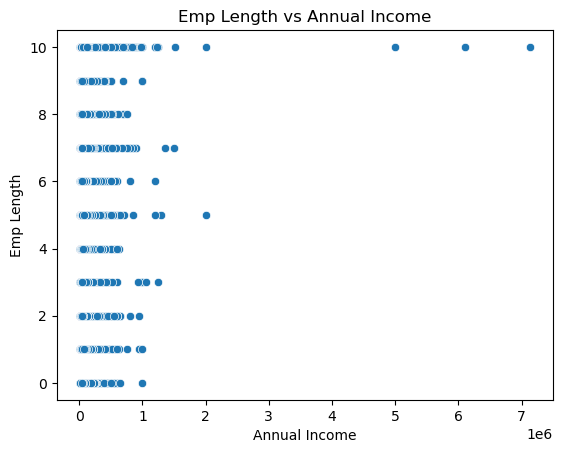

In [90]:
sns.scatterplot(x='annual_inc', y='emp_length', data=loan_data)
plt.title('Emp Length vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Emp Length')
plt.show()

- There appears to be no clear or significant relationship between employee length and annual income. Therefore, we will fill the null values in the 'emp_length' column using the median value.

In [93]:
# Handle missing values by filling with the median of the column
loan_data['emp_length'].fillna(loan_data['emp_length'].median(), inplace=True)

# Check the cleaned values
print(loan_data['emp_length'].unique())

[ 3. 10.  4.  5.  2.  7.  6.  1.  9.  0.  8.]


### Handling missing values:  'tot_hi_cred_lim'

- The `tot_hi_cred_lim` column represents the total high credit/credit limit.

- When the `tot_cur_bal` is null (which we have already filled with 0), the corresponding `tot_hi_cred_lim` is null, indicating that the customer does not have an active account.

- In these cases, the total high credit/credit limit should logically be 0. Therefore, we will fill the null values in the `tot_hi_cred_lim` column with 0.

In [29]:
# Number of null values in the 'tot_hi_cred_lim' column
print("Number of null values in 'tot_hi_cred_lim': ",loan_data['tot_hi_cred_lim'].isnull().sum())


# Number of null values in the 'tot_hi_cred_lim' where tot_curr_bal is 0
count = loan_data[(loan_data['tot_hi_cred_lim'].isnull()) & (loan_data['tot_cur_bal'] == 0)].shape[0]
print("Number of null values in 'tot_hi_cred_lim' where tot_cur_bal is 0: ",count)

Number of null values in 'tot_hi_cred_lim':  7495
Number of null values in 'tot_hi_cred_lim' where tot_cur_bal is 0:  7495


In [94]:
# Fill nulls with a 0
loan_data['tot_hi_cred_lim'] = loan_data['tot_hi_cred_lim'].fillna(0)

### Handling missing values: 'revol_util'

- The `revol_util` column represents the revolving line utilization rate, which is the amount of credit the borrower is using relative to all available revolving credit.

- Based on the analysis of null values in this column, we cannot conclusively determine if the missing values are due to the customer not having a credit card, making it impossible to calculate the revolving utilization rate.

- While borrowers with low credit utilization (close to 0) are generally considered low risk for credit management, filling the missing values with 0 would be misleading. Similarly, filling with a higher value would not be appropriate, as we cannot assume the customer is negligent in managing their credit.

- It is reasonable to assume that '`revol_util` could be 0 if the `dti` (debt-to-income ratio) is 0, but there are only 4 such cases.

- An alternative could be filling them with the median value of the revol_util column for the available data. This assumes that missing values are random and don't suggest any inherent characteristic.

In [101]:
# Number of null values in the 'revol_util' column
print("Total number of null values in the 'revol_util' column: ",loan_data['revol_util'].isnull().sum())

# Number of null values in the 'revol_util' where tot_curr_bal is 0
count = loan_data[(loan_data['revol_util'].isnull()) & (loan_data['tot_cur_bal'] == 0)].shape[0]
print("Number of null values in the 'revol_util' column where tot_cur_bal = 0: ",count)

# Number of null values in the 'revol_util' where total_bc_limit is 0
count = loan_data[(loan_data['revol_util'].isnull()) & (loan_data['total_bc_limit'] == 0)].shape[0]
print("Number of null values in the 'revol_util' column where total_bc_limit = 0: ",count)

# Number of null values in the 'revol_util' where tot_hi_cred_lim is 0
count = loan_data[(loan_data['revol_util'].isnull()) & (loan_data['tot_hi_cred_lim'] == 0)].shape[0]
print("Number of null values in the 'revol_util' column where tot_hi_cred_lim = 0: ",count)

Total number of null values in the 'revol_util' column:  127
Number of null values in the 'revol_util' column where tot_cur_bal = 0:  37
Number of null values in the 'revol_util' column where total_bc_limit = 0:  110
Number of null values in the 'revol_util' column where tot_hi_cred_lim = 0:  110


In [31]:
# Looking at rows where revol_util is null and dti = 0
loan_data[(loan_data['revol_util'].isnull()) & (loan_data['dti']==0)][['revol_util','dti']]

,revol_util,dti
60949,NaN,0.0
73505,NaN,0.0
127456,NaN,0.0
180502,NaN,0.0


In [95]:
# Fill missing values with the median of 'revol_util'
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].median())

### Checking if we handled all the nulls in the data

In [96]:
# Total number of null values in the dataset
total_nulls = loan_data.isnull().sum().sum()
print("Total number of null values in the dataset: ", total_nulls)

Total number of null values in the dataset:  0


### Creating new feature : loan-to-income ratio

In [97]:
loan_data["lti"] = loan_data["loan_amnt"] / loan_data["annual_inc"]
loan_data[["lti","loan_amnt","annual_inc"]].head(5)

,lti,loan_amnt,annual_inc
0,0.269643,7550,28000.0
1,0.491818,27050,55000.0
2,0.200000,12000,60000.0
3,0.086154,28000,325000.0
4,0.300000,12000,40000.0


## Data Analysis

### Univariate Analysis

#### Plot distribution of numerical features

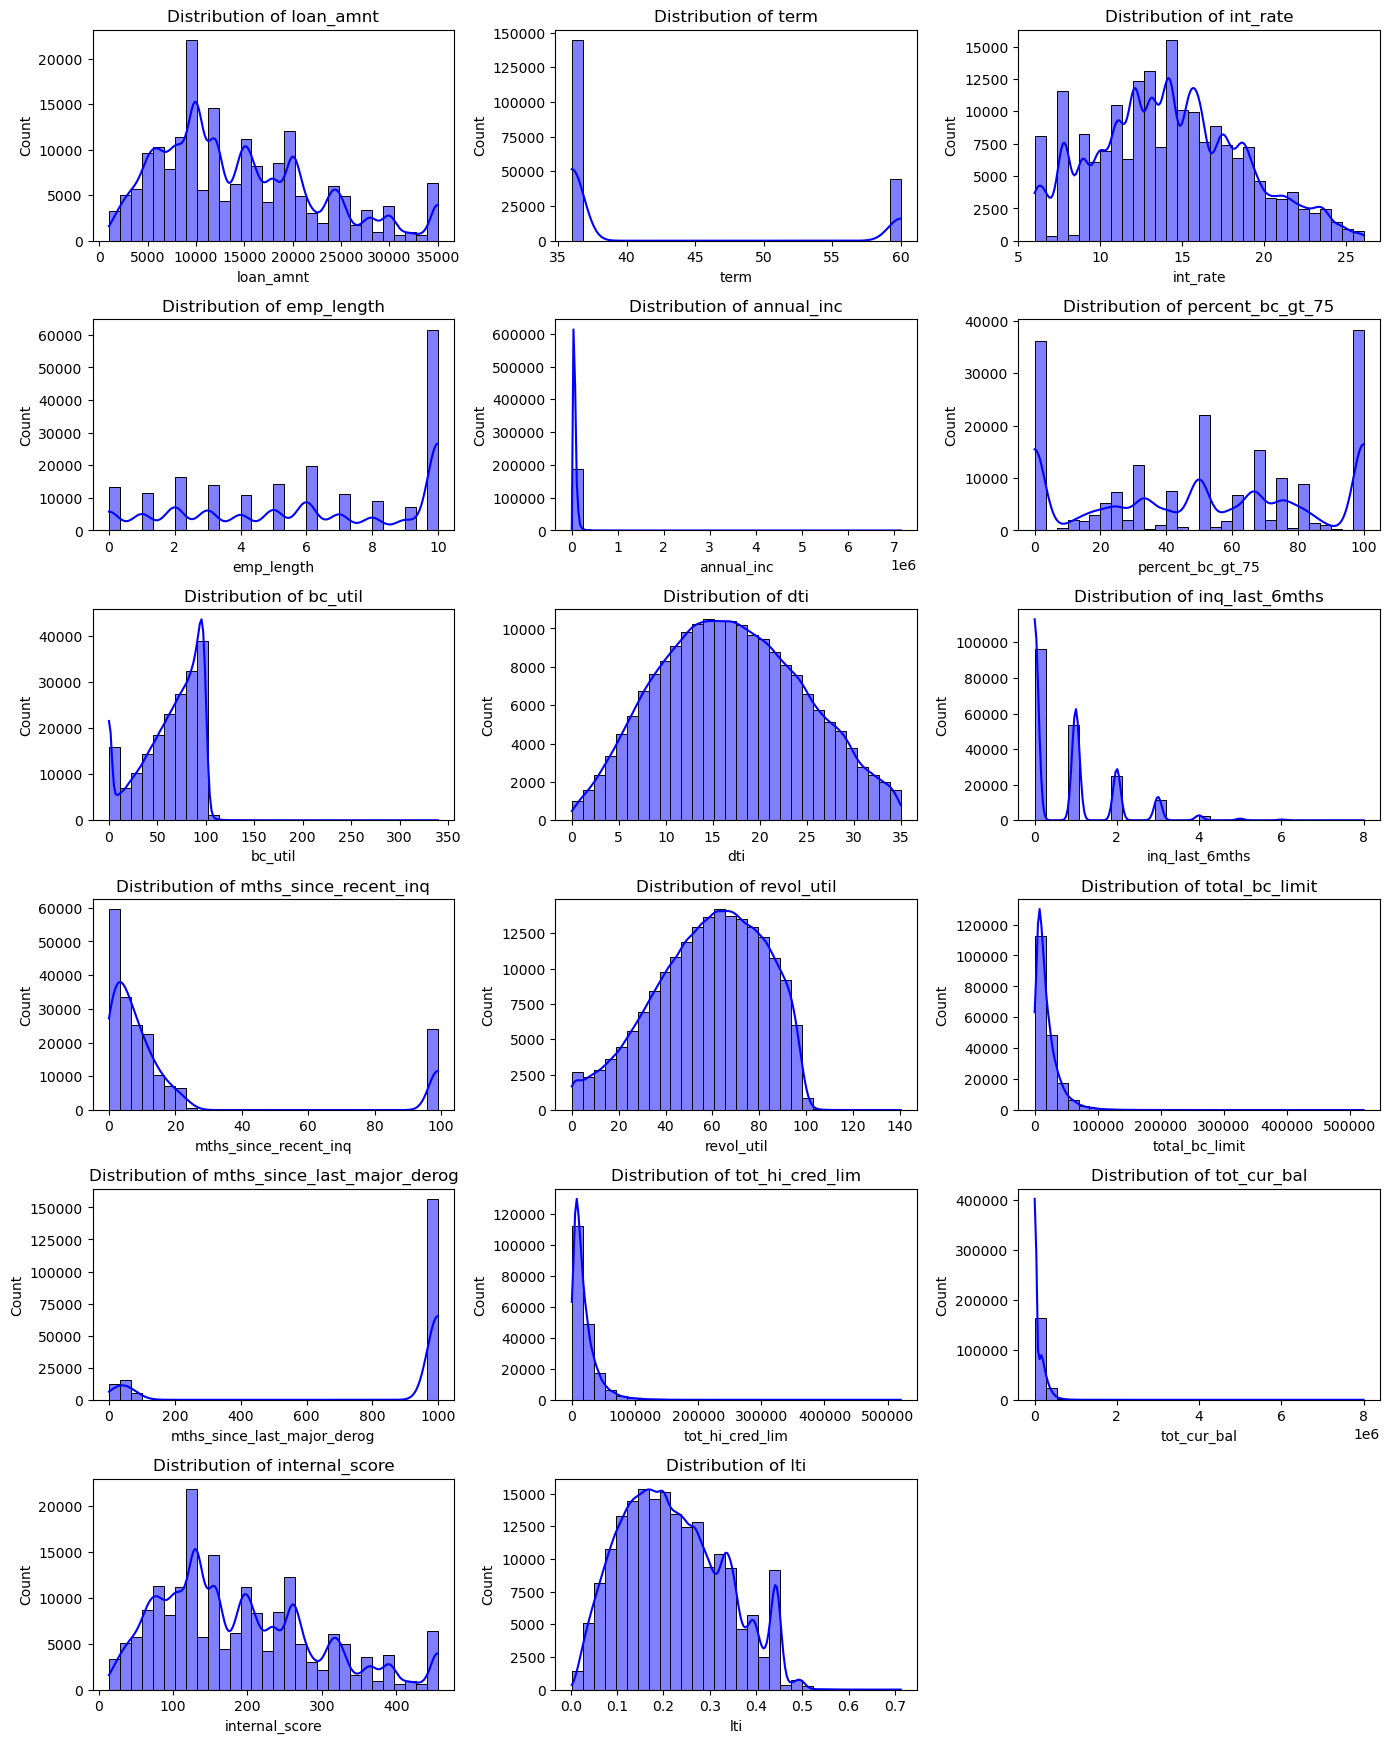

In [98]:
numerical_features = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'bad_flag' and 'active_acc' from the list
numerical_features.remove('bad_flag')
numerical_features.remove('active_acc')

plt.figure(figsize=(14, 20))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(7, 3, i)
    sns.histplot(loan_data[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Here are the most significant and notable insights from the distributions that would be valuable for loan default prediction:

**Key Notable Patterns:**

**1. Credit Utilization Behavior:**
- Strong bimodal pattern in credit usage - borrowers tend to either fully utilize (100%) or barely use (0%) their credit lines
- Most borrowers have high revolving utilization (40-90%), suggesting many applicants are heavily reliant on credit

**2. Critical Risk Indicators:**
- Sharp decline in applications after 2 credit inquiries in 6 months - suggests this is a key risk threshold
- Employment length shows stability bias - huge spike at 10+ years experience
- Derogatory marks show clear segmentation - either very recent (high risk) or none at all (low risk)

**3. Income and Loan Patterns:**
- Most borrowers request standardized loan amounts ($10k, $15k, $20k) rather than specific needs-based amounts
- Strong preference for 36-month terms over 60-month terms
- Loan-to-income ratios above 0.4 are rare, suggesting a possible risk threshold

**4. Internal Risk Assessment:**
- Internal scoring shows distinct risk tiers (peaks at 150, 200, 300)
- Clear maximum thresholds evident:
  - DTI ratios capped around 35%
  - Interest rates rarely exceed 25%
  - LTI ratios rarely exceed 0.5

These patterns suggest natural breakpoints for risk assessment and could be particularly valuable for predicting loan defaults. The bimodal and threshold patterns across multiple metrics indicate clear demarcation points between lower and higher risk applications.

#### Plot distribution of categorical features

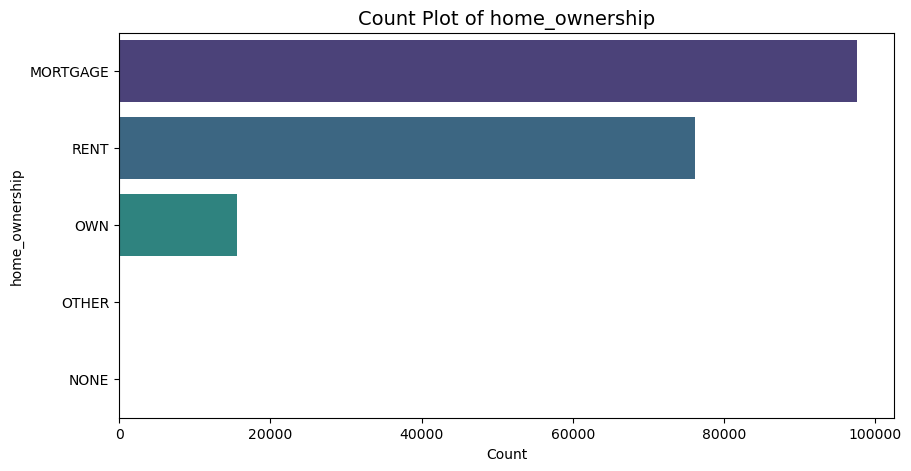

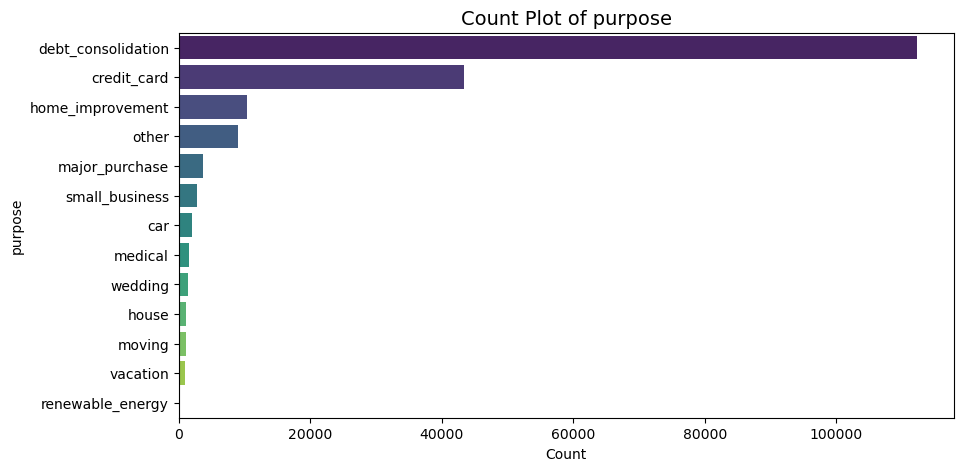

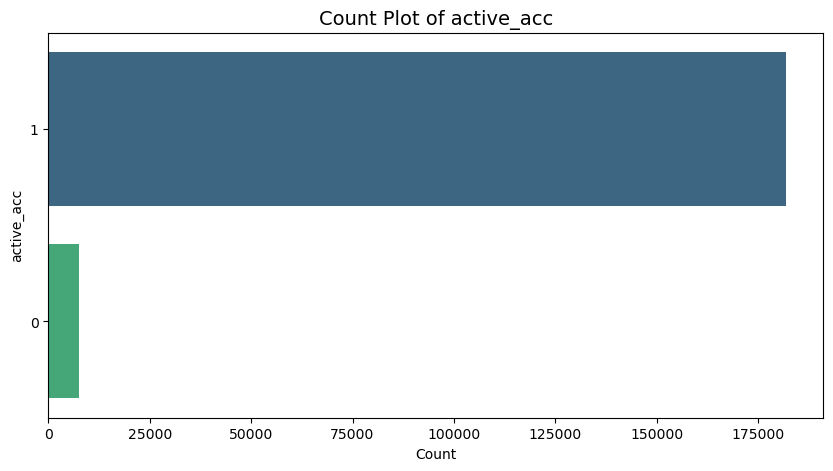

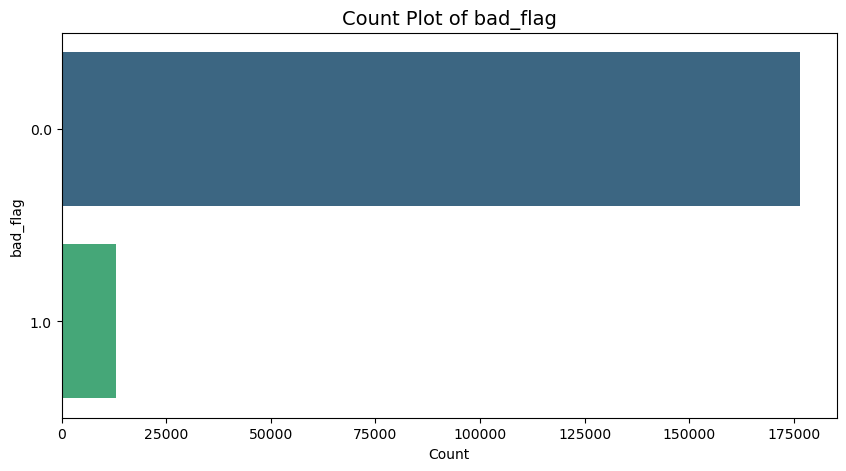

In [99]:
# Identify categorical variables
categorical_features = loan_data.select_dtypes(include=['object', 'category']).columns.tolist()

if 'active_acc' not in categorical_features:
    categorical_features.append('active_acc')

if 'bad_flag' not in categorical_features:
    categorical_features.append('bad_flag')

# Generate count plots for all categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=loan_data, y=feature, order=loan_data[feature].value_counts().index, palette="viridis")
    plt.title(f'Count Plot of {feature}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


- The high proportion of debt consolidation and credit card refinancing suggests many applicants are seeking to manage existing debt obligations
- The low proportion of asset-building loans (house, car, business) might indicate a customer base more focused on debt management than wealth creation
- The dominance of MORTGAGE/RENT over OWN suggests most applicants have significant monthly housing obligations
- A model built using this data may not be appropriate to predict loan defaultness for all types of loans as it could be biased towards the loans that are requested for debt management and credit card.
- The data is highly imbalanced and hence sampling has to be done.

### Bivariate Analysis

#### Correlation between numerical variables

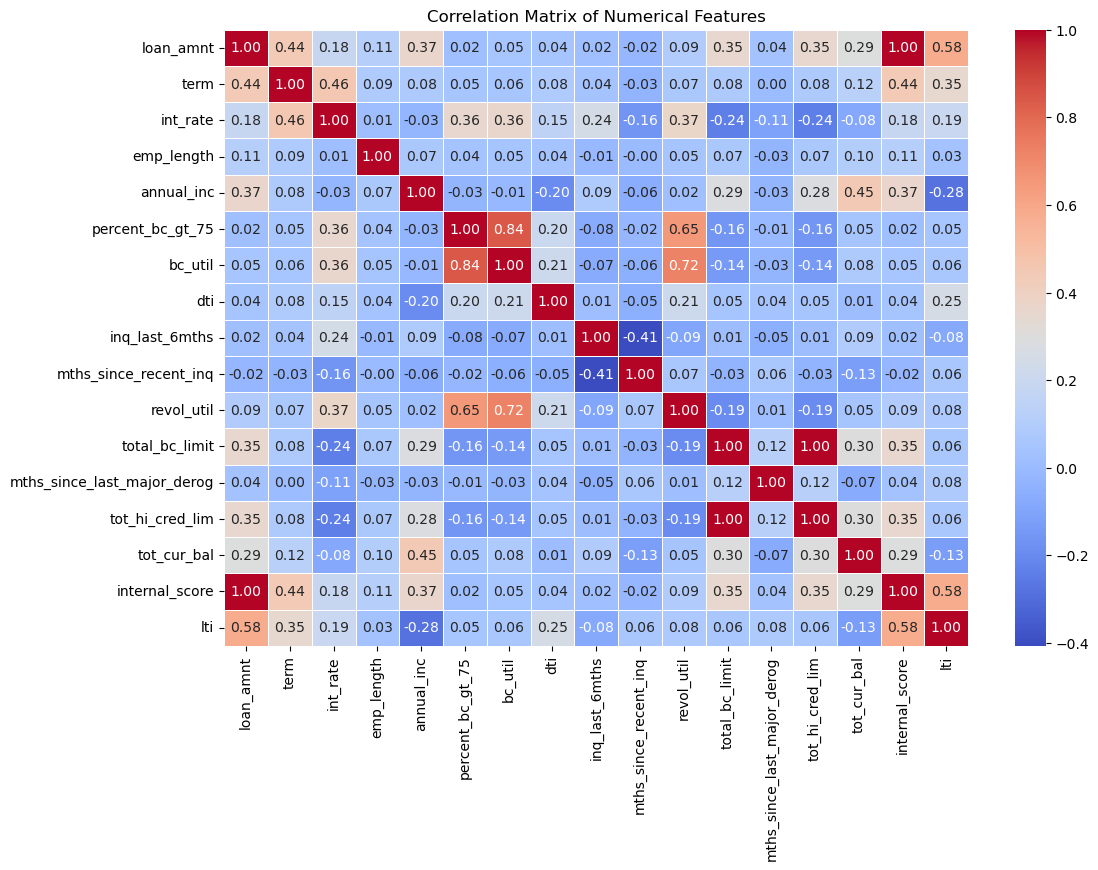

In [55]:
# Correlation matrix to identify relationships between numerical variables
correlation_matrix = loan_data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**1. Strong Positive Correlations (>0.7):**
- bc_util and percent_bc_gt_75 (0.84): Very strong correlation between bankcard utilization and percentage of cards highly utilized
- bc_util and revol_util (0.72): Strong relationship between bankcard and revolving utilization
- total_bc_limit and tot_hi_cred_lim (1.00): Perfect correlation suggesting these measure similar aspects of credit availability

**2. Important Independent Variables (Low Correlations):**
- emp_length shows very weak correlations with most variables
- dti has weak correlations with most variables
- mths_since_last_major_derog shows minimal correlation with other features

These correlations suggest:
- Credit utilization metrics are strongly interrelated
- Employment length and DTI could be valuable independent predictors
- Some features might be redundant (e.g., total_bc_limit and tot_hi_cred_lim)

#### Correlation between categorical variables

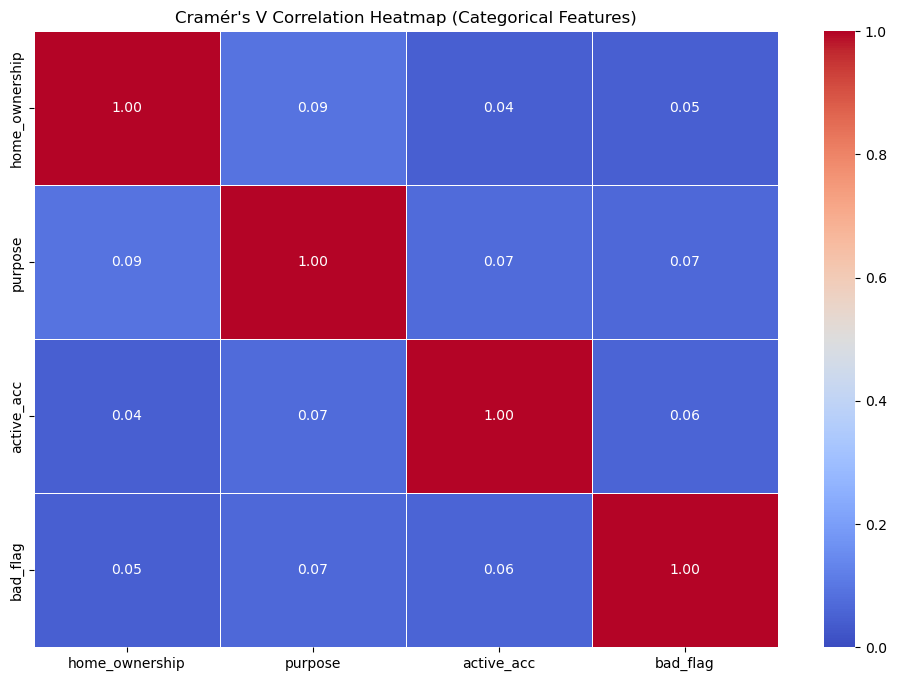

In [64]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total number of observations
    min_dim = min(contingency_table.shape) - 1  # Minimum dimension
    return np.sqrt(chi2 / (n * min_dim))

# Create an empty DataFrame to store the correlation matrix
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of categorical features
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:  # Skip the same pair
            cramers_v_matrix.loc[feature1, feature2] = cramers_v(loan_data[feature1], loan_data[feature2])
        else:
            cramers_v_matrix.loc[feature1, feature2] = 1  # Cramér's V for the same feature with itself is 1

# Convert the values to float for better readability
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create the heatmap for the Cramér's V correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f', linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap (Categorical Features)")
plt.show()

### Feature Analysis w.r.t Target Variable

#### Relationship between the target variable (bad_flag) and all numerical features

In [71]:
len(numerical_features)

17

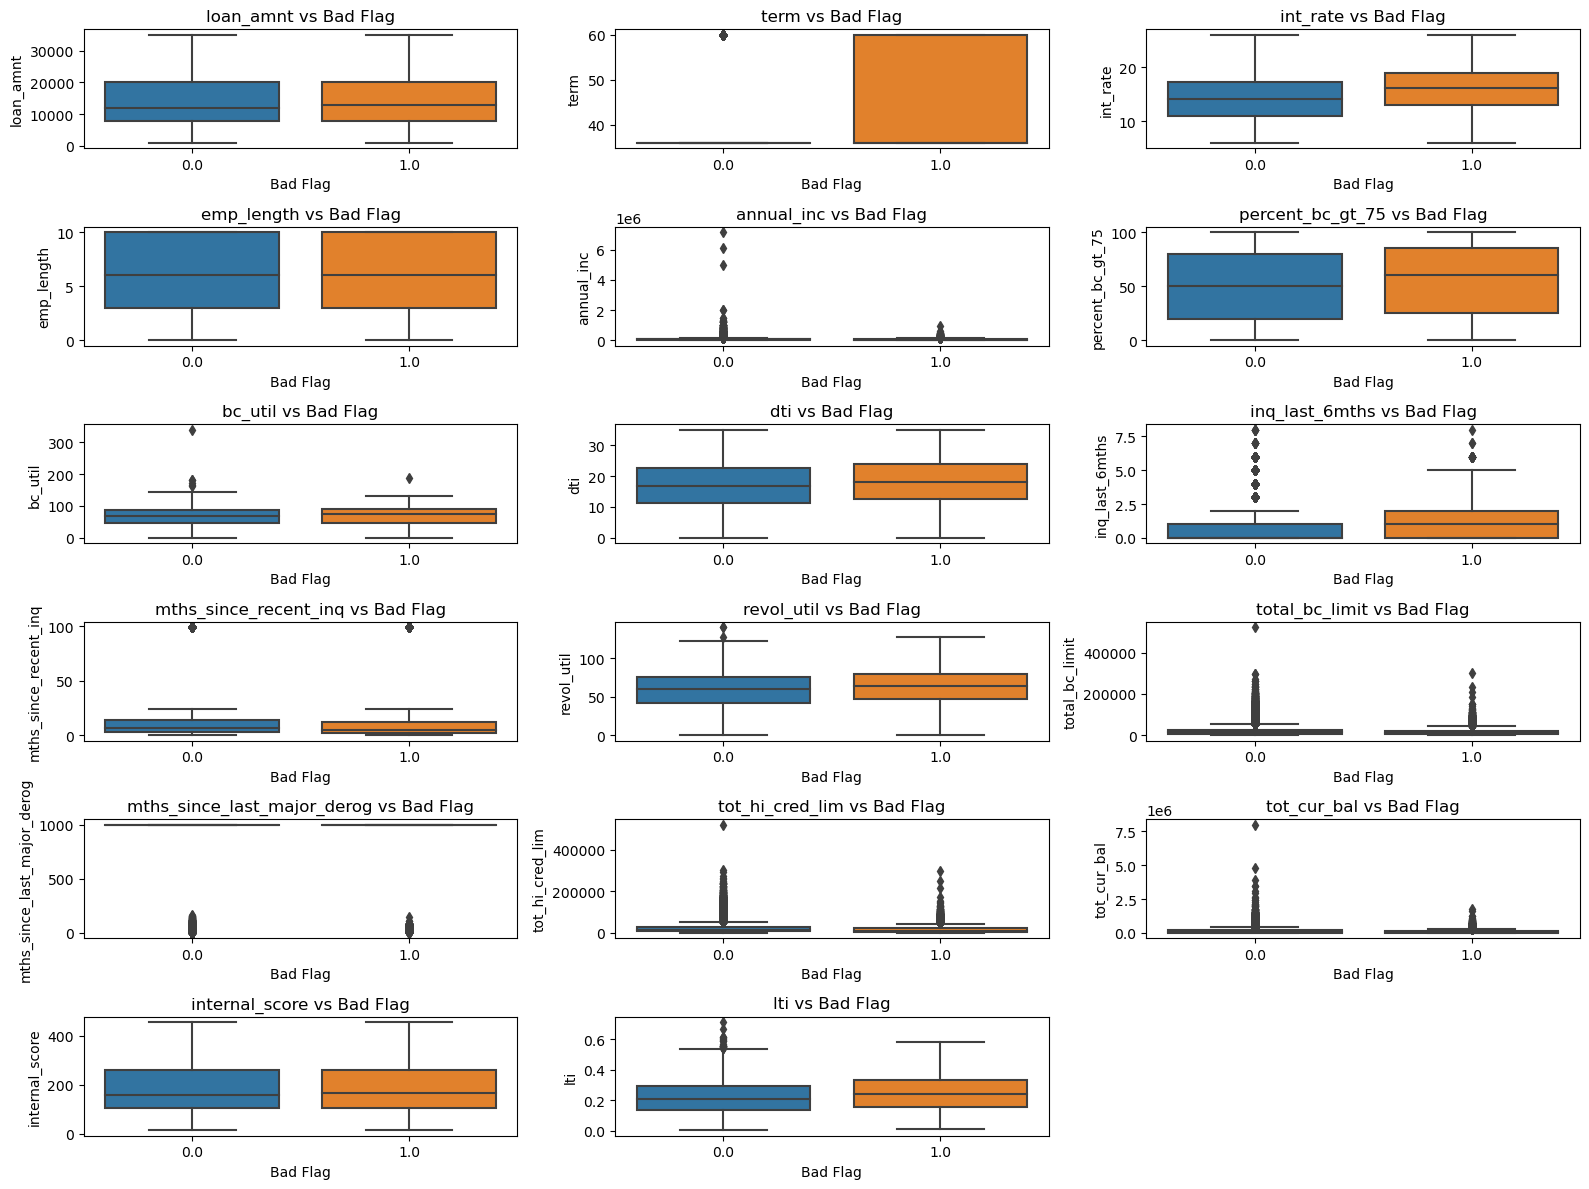

In [72]:
# Plotting boxplots for numerical features against 'bad_flag'
plt.figure(figsize=(16, 12))

# Number of rows and columns for the subplot grid
rows = 4
cols = 4

# Loop through the numerical features and plot each one in a subplot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x='bad_flag', y=feature, data=loan_data)
    plt.title(f'{feature} vs Bad Flag', fontsize=12)
    plt.xlabel('Bad Flag', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


- Bad loans show noticeably **higher interest rates**.
- Bad loans show **higher median number of inquiries**.

<Figure size 1500x1000 with 0 Axes>

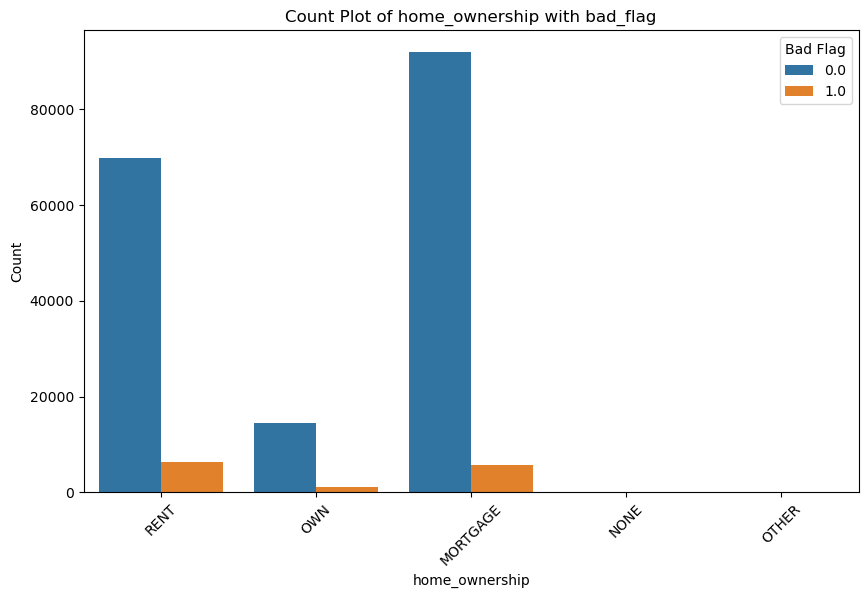

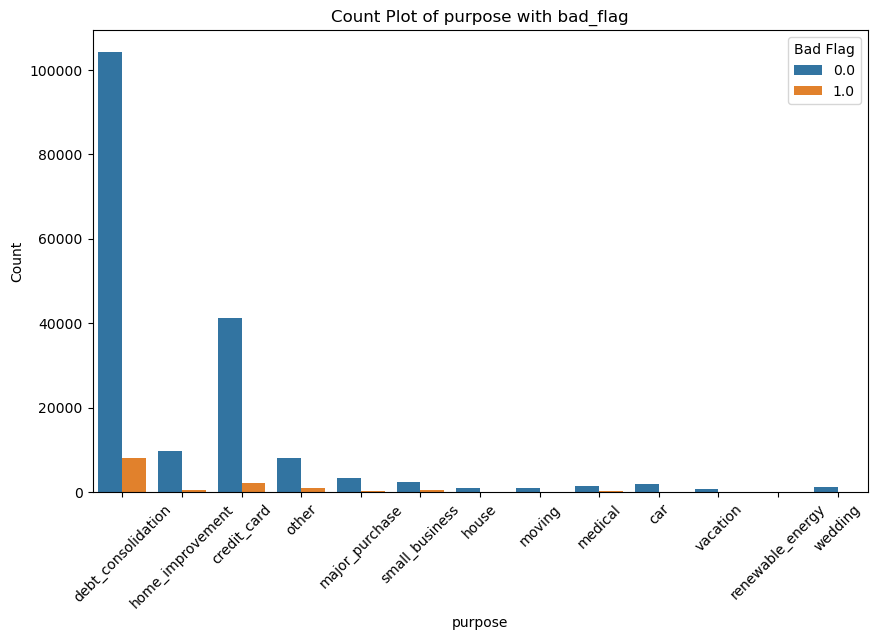

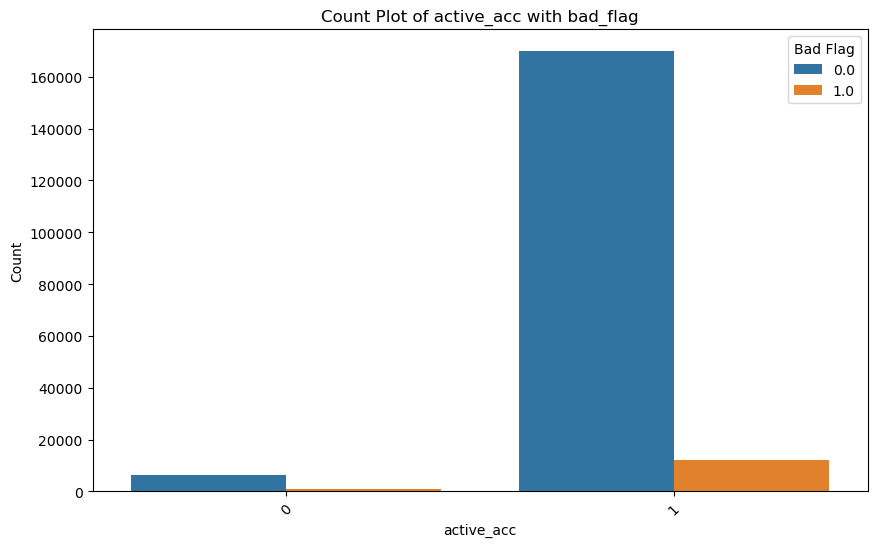

In [60]:
# Generate count plots
plt.figure(figsize=(15, 10))
for feature in categorical_features:
    if feature != 'bad_flag':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=loan_data, x=feature, hue='bad_flag')
        plt.title(f'Count Plot of {feature} with bad_flag')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Bad Flag', loc='upper right')
        plt.show()


## Saving cleaned data in a csv file

In [100]:
# Save DataFrame to CSV
loan_data.to_csv(os.path.join(path_to_py,"data","cleaned_data.csv"), index=False)  